# Import Libraries

In [73]:
import pandas as pd
import numpy as np
#Seaborn provides a variety of visualization pattern using few syntax
import seaborn as sns

In [74]:
#for interactive plots:
import matplotlib.pyplot as plt

In [75]:
#Numerical Python functions written for compatibility with MATLAB
import matplotlib.mlab as mlab

In [76]:
import matplotlib
plt.style.use('ggplot') #less code than matplotlib
from matplotlib.pyplot import figure #a collection of functions that make matplotlib work like MATLAB

In [77]:
#matplotlib inline: performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib
%matplotlib inline

In [78]:
#adjust plots' configuration
matplotlib.rcParams['figure.figsize'] = (12,8) 

# Read Data 

In [79]:
df = pd.read_csv(r'C:\Users\yesmi\OneDrive\Desktop\Data Analysis Projects\Correlation with Python-Movies Dataset\movies.csv')

In [80]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Missing Data

In [81]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [82]:
#some data is missing
#replace missing values with the mean of that column
for col in df.columns:
    df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [83]:
# drop rows containing null values to have 0% missing data
df = df.dropna()

# Data Cleaning

In [84]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


## 1.  Change some data types

In [85]:
#change data type of columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [108]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1757,2284,55,237000000,2847246203,2209,162.0
7445,529,5,0,2019,180,8.4,903000.0,160,730,2193,55,356000000,2797501328,1572,181.0
3045,6813,5,6,1997,696,7.8,1100000.0,1137,1757,1560,55,200000000,2201647264,2209,194.0
6663,5077,5,0,2015,690,7.8,876000.0,1107,2519,508,55,245000000,2069521700,1506,138.0
7244,530,5,0,2018,189,8.4,897000.0,160,730,2193,55,321000000,2048359754,1572,149.0


## 2.  Order data

In [87]:
#display full database
#pd.set_option('display.max_rows',None)

In [88]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

## 3. Duplicates

In [89]:
#drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0


## 4. Outliers

<AxesSubplot:>

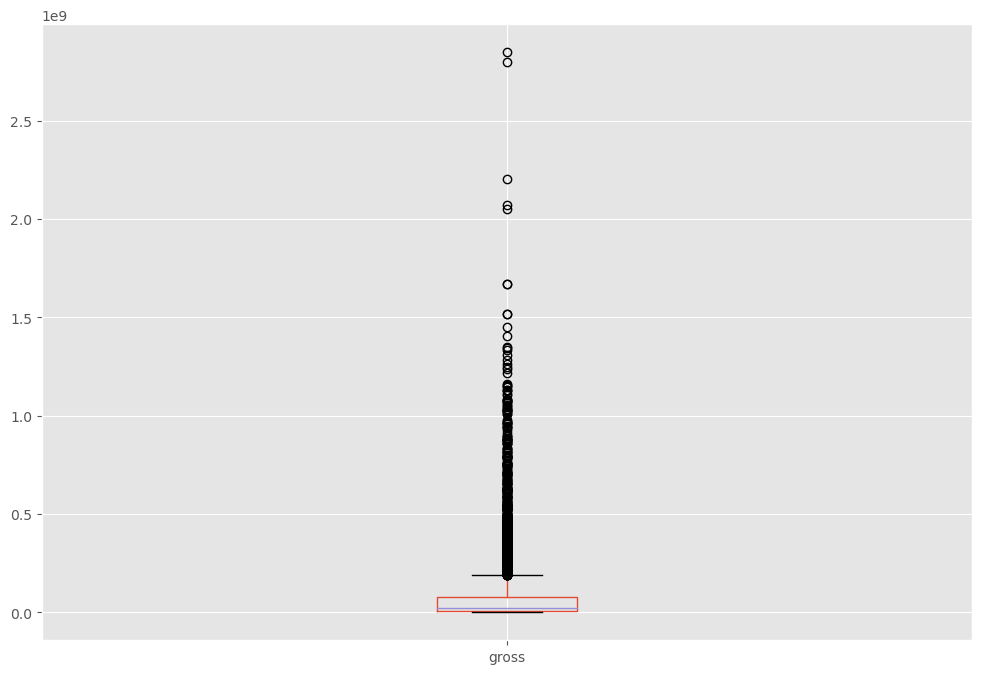

In [90]:
# Are there any Outliers?

df.boxplot(column=['gross'])

# Correlation

## Budget VS Gross

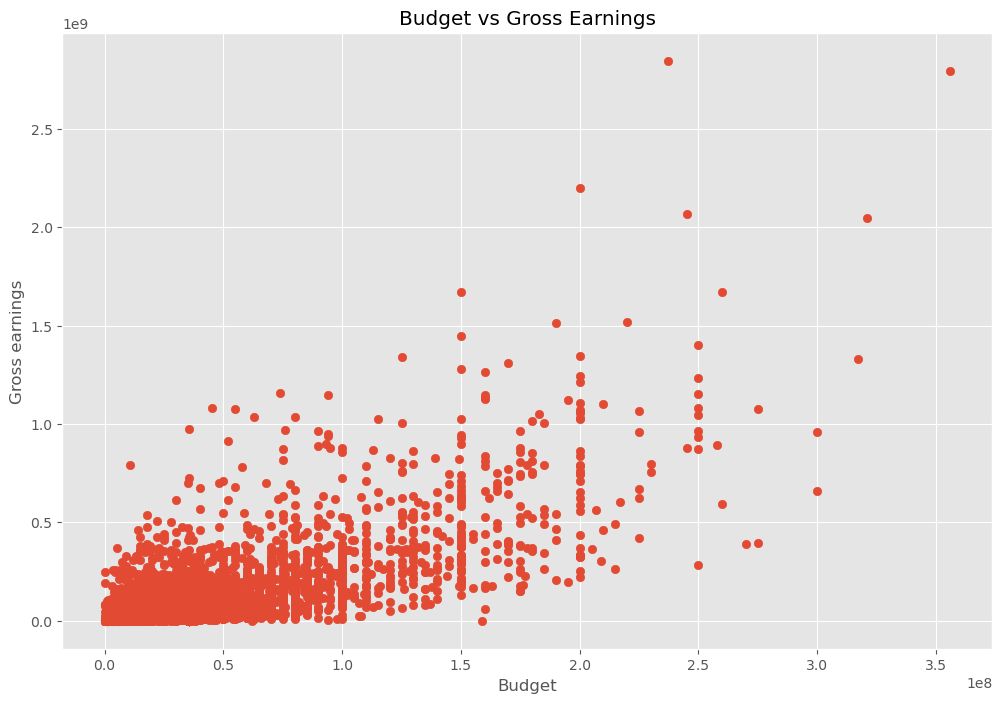

In [91]:
#Scatter Plot
plt.scatter(x=df['budget'],y=df['gross'])

plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross earnings")

plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

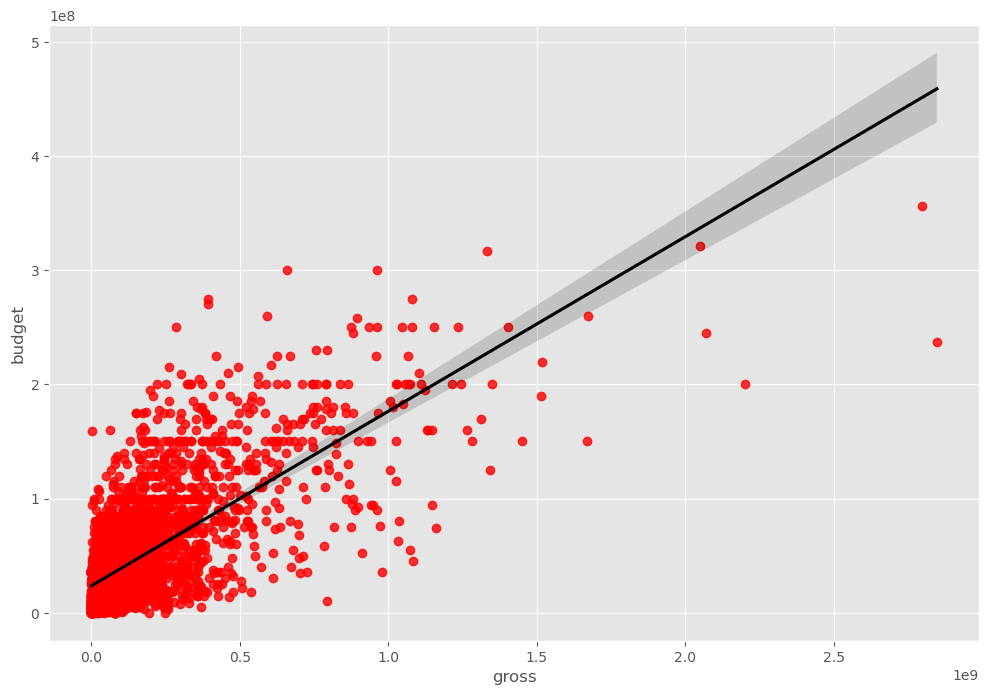

In [92]:
#Plot using seaborn
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"black"})

## Measuring Correlation

In [93]:
#Pearson correlation (Default method)
df.corr()
#highest correlation is between gross and budget (0.71) followed by votes and gross (0.63)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102156,0.226789,0.268848,0.254159,0.120811
score,0.102156,1.000000,0.411938,0.064652,0.185084,0.400527
votes,0.226789,0.411938,1.000000,0.421218,0.629325,0.309353
budget,0.268848,0.064652,0.421218,1.000000,0.712561,0.265934
gross,0.254159,0.185084,0.629325,0.712561,1.000000,0.241618
runtime,0.120811,0.400527,0.309353,0.265934,0.241618,1.000000


In [94]:
#Kendall to a measure  average likelihood ratio dependence
df.corr(method="kendall")
#highest correlation is between votes and gross (0.51)

,year,score,votes,budget,gross,runtime
year,1.000000,0.070439,0.339303,0.145845,0.185413,0.097034
score,0.070439,1.000000,0.303971,0.002826,0.083292,0.284054
votes,0.339303,0.303971,1.000000,0.166428,0.513297,0.198416
budget,0.145845,0.002826,0.166428,1.000000,0.263041,0.162957
gross,0.185413,0.083292,0.513297,0.263041,1.000000,0.157671
runtime,0.097034,0.284054,0.198416,0.162957,0.157671,1.000000


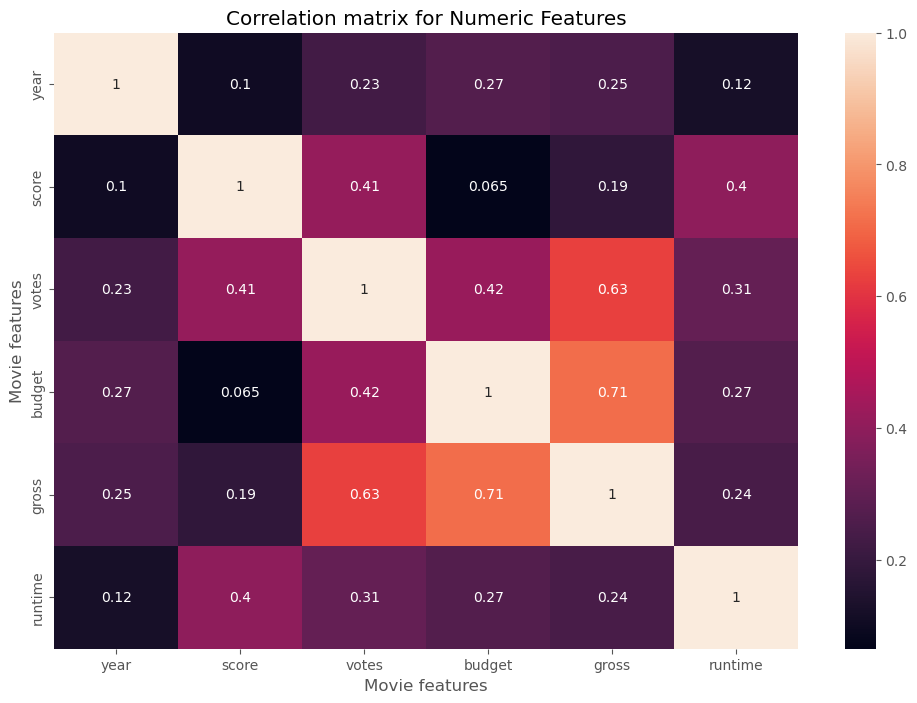

In [95]:
#correlation matrix
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

## Numerize Categorical Variables

In [96]:
# Using factorize - this assigns a random numeric value for each unique categorical value

#df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1757,2284,55,237000000,2847246203,2209,162.0
7445,529,5,0,2019,180,8.4,903000.0,160,730,2193,55,356000000,2797501328,1572,181.0
3045,6813,5,6,1997,696,7.8,1100000.0,1137,1757,1560,55,200000000,2201647264,2209,194.0
6663,5077,5,0,2015,690,7.8,876000.0,1107,2519,508,55,245000000,2069521700,1506,138.0
7244,530,5,0,2018,189,8.4,897000.0,160,730,2193,55,321000000,2048359754,1572,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,2996,6.1,2900.0,1919,1260,2113,54,35589876,1672,1830,87.0
2906,4340,3,5,1996,518,7.4,37000.0,2014,1934,1473,11,35589876,1605,327,110.0
3818,3320,6,4,2000,1103,6.5,5200.0,717,1105,2269,54,35589876,1400,463,103.0
7580,4602,3,5,2019,1814,5.2,735.0,1423,2177,2229,55,35589876,682,1949,93.0


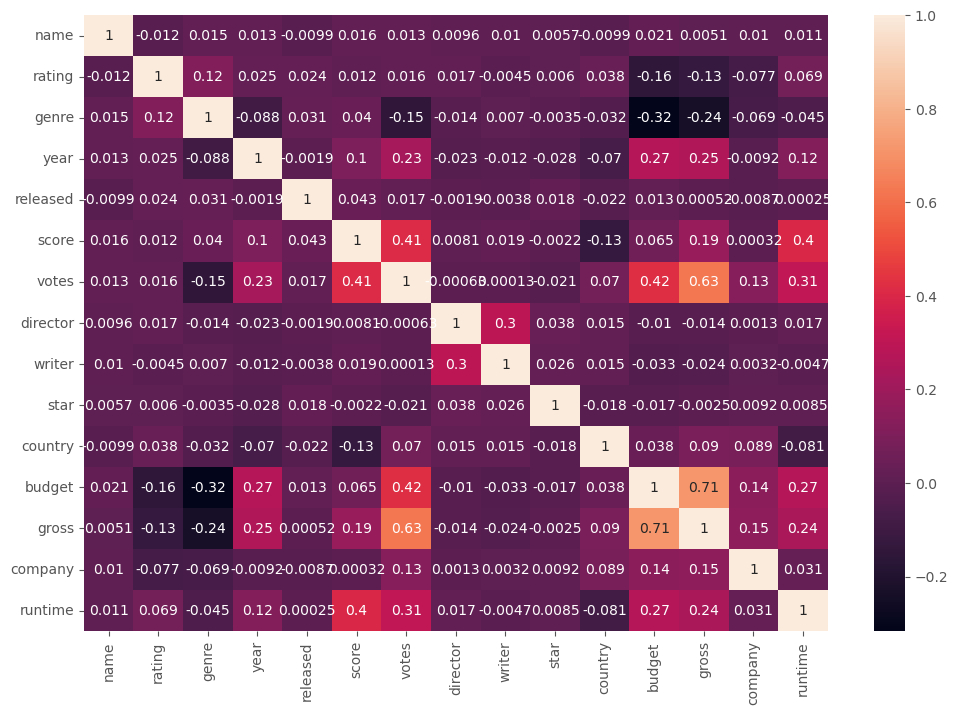

In [97]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [98]:
""""correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)"""

correlation_mat=df_numerized.corr()
correlation_pairs = correlation_mat.unstack()

correlation_pairs

name     name        1.000000
         rating     -0.011944
         genre       0.015250
         year        0.013483
         released   -0.009936
                       ...   
runtime  country    -0.081417
         budget      0.265934
         gross       0.241618
         company     0.030856
         runtime     1.000000
Length: 225, dtype: float64

In [100]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country  score     -0.101347
score    country   -0.101347
country  genre     -0.073157
genre    country   -0.073157
score    rating    -0.068982
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [106]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[(sorted_pairs) > 0.5]
print(strong_pairs)

company   star        0.514432
star      company     0.514432
          director    0.517738
director  star        0.517738
writer    released    0.520700
released  writer      0.520700
writer    star        0.538146
star      writer      0.538146
company   director    0.559376
director  company     0.559376
company   writer      0.568021
writer    company     0.568021
votes     name        0.568191
name      votes       0.568191
votes     gross       0.581821
gross     votes       0.581821
name      star        0.618293
star      name        0.618293
gross     star        0.632893
star      gross       0.632893
released  name        0.637081
name      released    0.637081
released  gross       0.650221
gross     released    0.650221
name      company     0.655229
company   name        0.655229
director  writer      0.659231
writer    director    0.659231
gross     company     0.668744
company   gross       0.668744
director  name        0.687081
name      director    0.687081
gross   

*Votes* and *Budget* have the highest correlation to gross earnings.